In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVR

In [8]:
dataset = pd.read_csv('front_face.csv')

In [9]:
dataset.head(5)

,id,height,weight,bmi-gt,class-gt,CJWR,WHR,PAR,ES,FWR,MEH,CFR
0,290079.jpg,1.65,97.52,35.82,d,1.19,1.64,0.02,44.50,1.38,36.34,45.37
1,290167.jpg,1.57,68.04,27.60,c,1.22,1.51,0.02,36.50,1.23,29.26,43.70
2,290173.jpg,1.63,62.14,23.39,b,1.24,1.57,0.03,32.51,1.30,24.35,35.59
3,290248.jpg,1.75,72.57,23.70,b,1.20,1.78,0.02,42.02,1.23,29.30,36.43
4,290250.jpg,1.88,94.35,26.69,c,1.23,1.66,0.02,43.00,1.28,25.92,40.13


In [10]:
len(dataset)

256

In [41]:
test_size = 0.2
test_count = int(len(dataset) * test_size)
print('test size: {}, test count: {}'.format(test_size, test_count))

test size: 0.2, test count: 51


In [19]:
feat_list = ['CJWR', 'WHR', 'PAR', 'ES', 'FWR', 'MEH', 'CFR']
x_data = dataset.loc[:, feat_list].values
y_data = dataset.loc[:, ['bmi-gt']].values

In [26]:
regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor.fit(x_data, y_data)

C:\Users\Puff\Anaconda3\envs\ImgNrlz\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### 使用joblib.dump匯出預測器

In [28]:
from sklearn.externals import joblib
joblib.dump(regressor, 'front256_svr.pkl')

['front256_svr.pkl']

### 將剛剛輸出的模型載入 

In [30]:
regressor = joblib.load('front256_svr.pkl')

In [31]:
regressor.fit(x_data, y_data)

C:\Users\Puff\Anaconda3\envs\ImgNrlz\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### 使用score計算準確率

In [33]:
predict = regressor.predict(x_data)
regressor.score(x_data, y_data)

0.9771072635544947

### 繪出預測結果與實際目標差異圖

Text(0, 0.5, 'Measured')

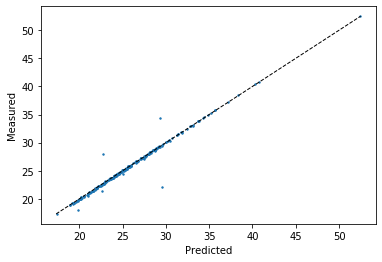

In [40]:
plt.scatter(predict, y_data, s=2)
plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'k--', lw=1)
plt.xlabel('Predicted')
plt.ylabel('Measured')

In [11]:
# # from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
# mm_scaler = preprocessing.MinMaxScaler()

# x_train = mm_scaler.fit_transform(x_train)
# y_train = mm_scaler.fit_transform(y_train)

# x_test = mm_scaler.fit_transform(x_test)
# y_test = mm_scaler.fit_transform(y_test)

In [55]:
img_id = dataset['id'].values

report = pd.DataFrame(columns=['id', 'PRS', 'FACT', 'DEV', 'E'])

for face, p_result, fact in zip(img_id, predict, y_data):
    fact = fact[0]
    dev = round(abs(p_result - fact), 2)
    
    error = round(dev / fact, 2)
    
    
    record = [face, p_result, fact, dev, error]
    report.loc[len(report)] = record
    
#     break


In [56]:
report

,id,PRS,FACT,DEV,E
0,290079.jpg,35.720045,35.82,0.1,0.00
1,290167.jpg,27.500117,27.60,0.1,0.00
2,290173.jpg,23.290311,23.39,0.1,0.00
3,290248.jpg,23.599713,23.70,0.1,0.00
4,290250.jpg,26.589807,26.69,0.1,0.00
5,290350.jpg,28.730389,28.63,0.1,0.00
6,290376.jpg,31.289853,31.39,0.1,0.00
7,290384.jpg,24.649992,24.75,0.1,0.00
8,290391.jpg,27.899820,28.00,0.1,0.00
9,290392.jpg,31.810109,31.71,0.1,0.00
